In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 讀取事件日誌資料
df = pd.read_csv('simulated_resume_event_log.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by=['resume_id', 'timestamp'])
df['next_activity'] = df.groupby('resume_id')['activity'].shift(-1)
df['next_timestamp'] = df.groupby('resume_id')['timestamp'].shift(-1)
df['duration'] = (df['next_timestamp'] - df['timestamp']).dt.total_seconds()
df_filtered = df.dropna(subset=['next_activity', 'duration'])

In [3]:
# 計算平均耗時（以分鐘表示）
avg_duration = df_filtered.groupby('activity')['duration'].mean().round(2)
avg_duration_minutes = (avg_duration / 60).round(2).sort_values(ascending=False)
avg_duration_minutes_df = avg_duration_minutes.reset_index()
avg_duration_minutes_df.columns = ['activity', 'avg_duration_minutes']
avg_duration_minutes_df

,activity,avg_duration_minutes
0,Resume Filtered,138.80
1,Offer Sent,134.94
2,Interview Scheduled,134.30
3,Interview Completed,133.24
4,Resume Received,129.00


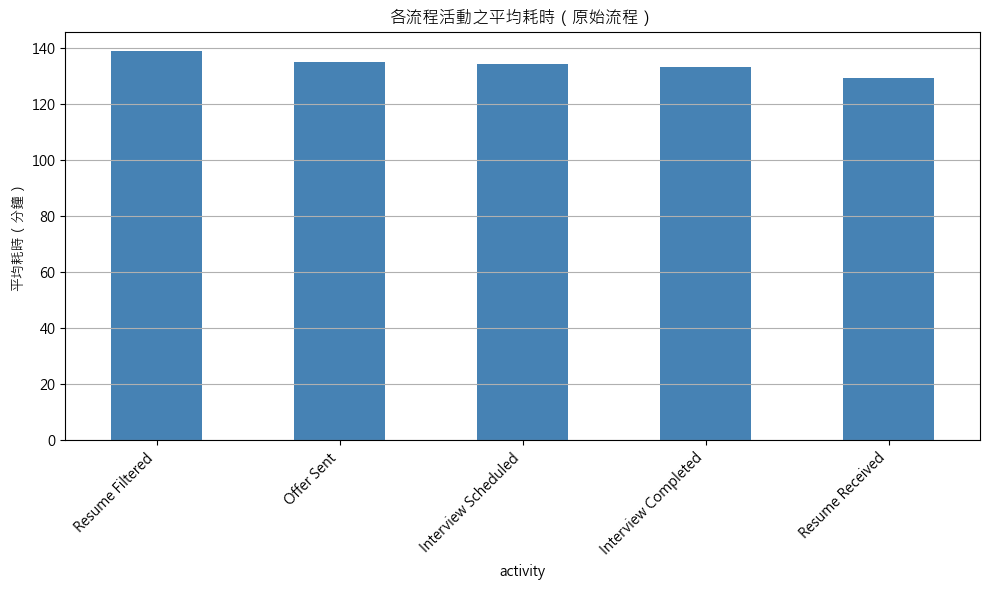

In [5]:
import matplotlib.pyplot as plt
import matplotlib

# 設定中文字型（Windows 建議用微軟正黑體）
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

# 畫出平均耗時圖表（繁體中文標題與標籤）
plt.figure(figsize=(10, 6))
avg_duration_minutes.plot(kind='bar', color='steelblue')
plt.ylabel('平均耗時（分鐘）')
plt.title('各流程活動之平均耗時（原始流程）')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
